# **Task 1: Harris Corner Detection**

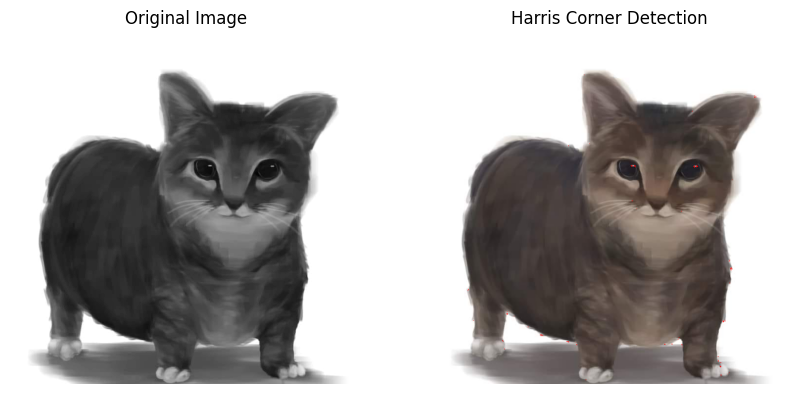

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def harris_corner_detection(image_path="4B_VENANCIO_MATCHING.jpg"):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_copy = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if img is None or img_copy is None:
        print(f"Error: Could not load image at path '{image_path}'. Please check the file path.")
        return

    # Convert to float and apply Harris Corner Detection
    gray = np.float32(img)
    harris_corners = cv2.cornerHarris(gray, 2, 3, 0.04)

    # Mark the corners in red
    img_copy[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]

    # Display images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray')
    plt.title('Original Image'), plt.axis('off')
    plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
    plt.title('Harris Corner Detection'), plt.axis('off')
    plt.show()

# Run the function
harris_corner_detection()


# **Task 2: HOG Feature Extraction**

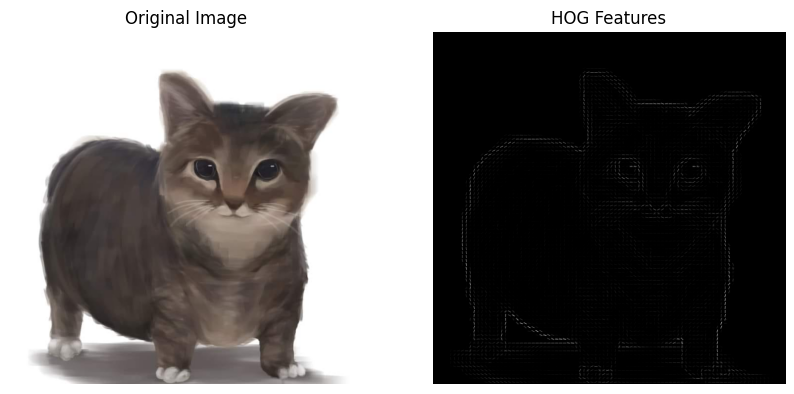

In [7]:
from skimage.feature import hog
import cv2
import matplotlib.pyplot as plt

def hog_feature_extraction(image_path="4B_VENANCIO_MATCHING.jpg"):
    img = cv2.imread(image_path)

    # Check if the image loaded successfully
    if img is None:
        print(f"Error: Could not load image at path '{image_path}'. Please check the file path.")
        return

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Extract HOG features and HOG visualization
    hog_features, hog_image = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                                  cells_per_block=(2, 2), visualize=True)

    # Display original and HOG images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image'), plt.axis('off')
    plt.subplot(1, 2, 2), plt.imshow(hog_image, cmap='gray')
    plt.title('HOG Features'), plt.axis('off')
    plt.show()

# Run the function
hog_feature_extraction()


# **Task 3: ORB Feature Extraction and Matching**

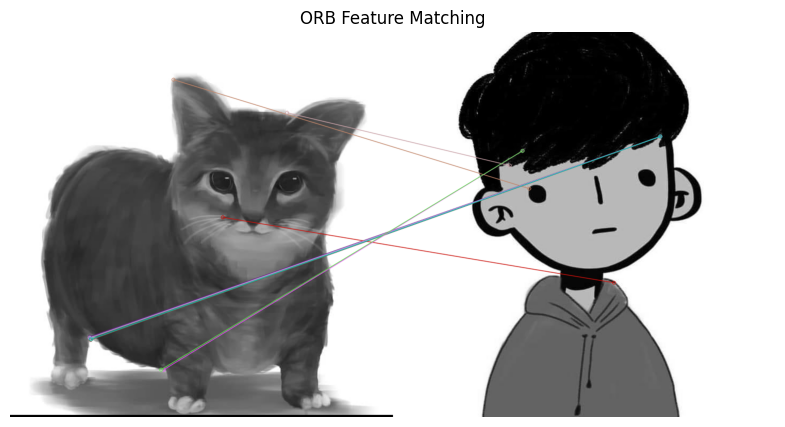

In [9]:
def orb_feature_matching(image_path1="4B_VENANCIO_MATCHING.jpg", image_path2="sample.jpg"):
    img1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

    if img1 is None or img2 is None:
        print(f"Error: Could not load one or both images. Please check the file paths.")
        return

    orb = cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    index_params = dict(algorithm=6, table_number=6, key_size=12, multi_probe_level=2)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)

    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)

    plt.figure(figsize=(10, 5))
    plt.imshow(img_matches)
    plt.title('ORB Feature Matching'), plt.axis('off')
    plt.show()

# Run the function
orb_feature_matching()


# **Task 4: SIFT and SURF Feature Extraction**

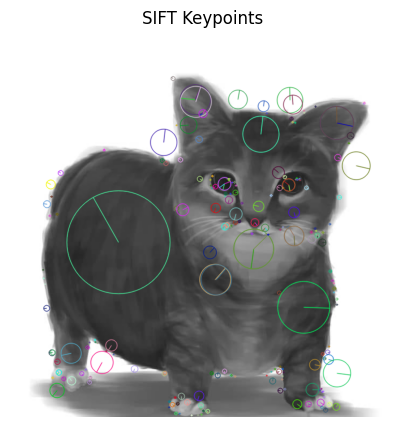

In [11]:
import cv2
import matplotlib.pyplot as plt

def sift_feature_extraction(image_path1="4B_VENANCIO_MATCHING.jpg", image_path2="sample.jpg"):
    img1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

    if img1 is None or img2 is None:
        print("Error: Could not load one or both images. Please check the file paths.")
        return

    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Detect keypoints and descriptors with SIFT
    kp_sift1, des_sift1 = sift.detectAndCompute(img1, None)
    kp_sift2, des_sift2 = sift.detectAndCompute(img2, None)

    # Draw SIFT keypoints on the first image
    img_sift1 = cv2.drawKeypoints(img1, kp_sift1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Display SIFT keypoints for the first image
    plt.figure(figsize=(10, 5))
    plt.imshow(img_sift1, cmap='gray')
    plt.title('SIFT Keypoints')
    plt.axis('off')
    plt.show()

# Run the function
sift_feature_extraction()


# **Task 5: Feature Matching using Brute-Force Matcher**

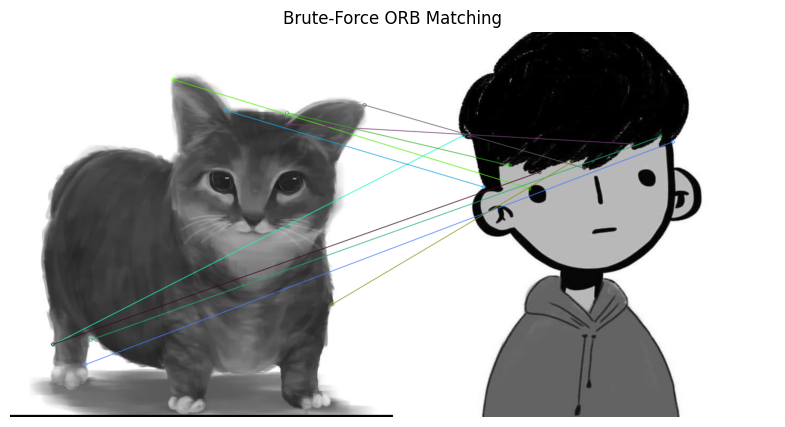

In [13]:
def brute_force_feature_matching(image_path1="4B_VENANCIO_MATCHING.jpg", image_path2="sample.jpg"):
    img1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

    if img1 is None or img2 is None:
        print(f"Error: Could not load one or both images. Please check the file paths.")
        return

    orb = cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)

    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=2)

    plt.figure(figsize=(10, 5))
    plt.imshow(img_matches)
    plt.title('Brute-Force ORB Matching'), plt.axis('off')
    plt.show()

# Run the function
brute_force_feature_matching()


# **Task 6: Image Segmentation using Watershed Algorithm**

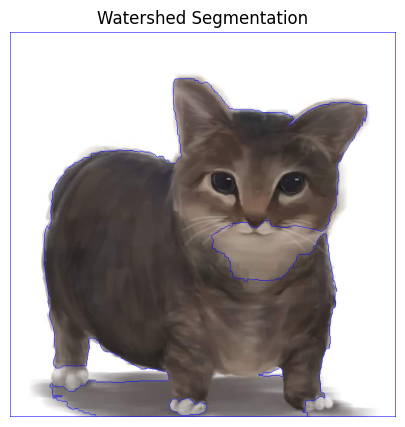

In [15]:
def watershed_segmentation(image_path="4B_VENANCIO_MATCHING.jpg"):
    img = cv2.imread(image_path)

    if img is None:
        print(f"Error: Could not load image at path '{image_path}'. Please check the file path.")
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    ret, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0

    markers = cv2.watershed(img, markers)
    img[markers == -1] = [255, 0, 0]

    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Watershed Segmentation'), plt.axis('off')
    plt.show()

# Run the function
watershed_segmentation()
